<a href="https://colab.research.google.com/github/davihaikel/Alura-Store/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [17]:
import pandas as pd
import matplotlib.pyplot as plt

urls = {
        "Loja 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
        "Loja 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
        "Loja 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
        "Loja 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv",
}

df= {}

for nome_lojas, url, in urls.items():
  df[nome_lojas] = pd.read_csv(url)
df['Loja 3'].head(10)

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Secadora de roupas,eletrodomesticos,1713.50,88.823159,17/12/2021,Camila Ribeiro,CE,4,cartao_credito,4,-5.20,-39.53
1,Cômoda,moveis,386.81,18.180908,10/02/2021,Larissa Alves,RS,3,cartao_credito,1,-30.17,-53.50
2,Violão,instrumentos musicais,404.62,23.197592,22/01/2023,Lucas Oliveira,SP,5,cartao_credito,3,-22.19,-48.79
3,Bola de vôlei,esporte e lazer,78.40,4.463341,22/03/2022,Pedro Gomes,BA,4,cartao_credito,6,-13.29,-41.71
4,Guarda roupas,moveis,694.76,34.578319,12/01/2022,Bianca Santos,SP,1,cartao_credito,1,-22.19,-48.79
5,Impressora,eletronicos,307.64,13.965344,20/11/2022,Mariana Ferreira,MG,5,cartao_credito,5,-18.10,-44.38
6,Carrinho controle remoto,brinquedos,74.26,4.237248,07/07/2020,Bruno Rodrigues,SP,2,boleto,1,-22.19,-48.79
7,Cadeira de escritório,moveis,619.44,33.514421,01/05/2022,Isabella Pereira,SP,5,boleto,1,-22.19,-48.79
8,Pandeiro,instrumentos musicais,58.01,3.619963,27/10/2021,Larissa Alves,MG,5,cartao_credito,3,-18.10,-44.38
9,Faqueiro,utilidades domesticas,44.73,0.000000,03/05/2022,Felipe Santos,RJ,5,boleto,1,-22.25,-42.66


## EDA

In [18]:
def tratamento(loja):
  nulos = loja.isnull().sum()
  duplicados = loja.duplicated().sum()
  return f'Valores nulos: {nulos}\n Linhas duplicadas: {duplicados}'

print(tratamento(loja))

Valores nulos: Produto                   0
Categoria do Produto      0
Preço                     0
Frete                     0
Data da Compra            0
Vendedor                  0
Local da compra           0
Avaliação da compra       0
Tipo de pagamento         0
Quantidade de parcelas    0
lat                       0
lon                       0
dtype: int64
 Linhas duplicadas: 0


In [19]:
print(tratamento(loja2))

Valores nulos: Produto                   0
Categoria do Produto      0
Preço                     0
Frete                     0
Data da Compra            0
Vendedor                  0
Local da compra           0
Avaliação da compra       0
Tipo de pagamento         0
Quantidade de parcelas    0
lat                       0
lon                       0
dtype: int64
 Linhas duplicadas: 0


In [20]:
print(tratamento(loja3))

Valores nulos: Produto                   0
Categoria do Produto      0
Preço                     0
Frete                     0
Data da Compra            0
Vendedor                  0
Local da compra           0
Avaliação da compra       0
Tipo de pagamento         0
Quantidade de parcelas    0
lat                       0
lon                       0
dtype: int64
 Linhas duplicadas: 0


In [21]:
print(tratamento(loja4))

Valores nulos: Produto                   0
Categoria do Produto      0
Preço                     0
Frete                     0
Data da Compra            0
Vendedor                  0
Local da compra           0
Avaliação da compra       0
Tipo de pagamento         0
Quantidade de parcelas    0
lat                       0
lon                       0
dtype: int64
 Linhas duplicadas: 0


#1. Análise do faturamento


O faturamento da Loja 1 foi de R$1534509.12
O faturamento da Loja 2 foi de R$1488459.06
O faturamento da Loja 3 foi de R$1464025.03
O faturamento da Loja 4 foi de R$1534509.12


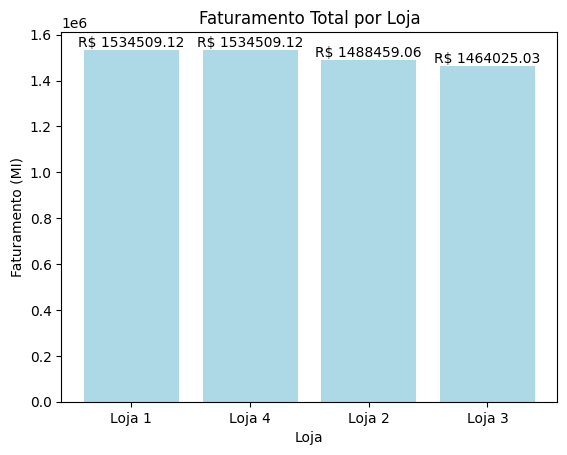

In [22]:
def faturamento (lista_de_lojas, nomes_lojas):
  resultados = []

  for loja, nome in zip(lista_de_lojas, nomes_lojas):
    fat = loja['Preço'].sum()
    resultados.append({'loja': nome,
                       'faturamento': fat})
    print(f'O faturamento da {nome} foi de R${fat :.2f}')

  df_faturamento = pd.DataFrame(resultados)
  df_faturamento = df_faturamento.sort_values(by = 'faturamento', ascending = False)

##Grafico

  plt.bar(df_faturamento['loja'], df_faturamento['faturamento'], color = 'lightblue')
  for i, valor in enumerate(df_faturamento['faturamento']):
    plt.text(i, valor, f'R$ {valor :.2f}', ha = 'center', va = 'bottom')
  plt.title('Faturamento Total por Loja')
  plt.xlabel('Loja')
  plt.ylabel('Faturamento (MI)')
  plt.show()

faturamento([loja, loja2, loja3, loja4], ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'])

# 2. Vendas por Categoria


    Categoria do Produto  Quantidade Vendida    loja
0             brinquedos                 338  Loja 4
0             brinquedos                 324  Loja 1
0             brinquedos                 315  Loja 3
0             brinquedos                 313  Loja 2
1       eletrodomesticos                 312  Loja 1
1       eletrodomesticos                 305  Loja 2
1       eletrodomesticos                 278  Loja 3
1       eletrodomesticos                 254  Loja 4
2            eletronicos                 451  Loja 3
2            eletronicos                 451  Loja 4
2            eletronicos                 448  Loja 1
2            eletronicos                 422  Loja 2
3        esporte e lazer                 284  Loja 1
3        esporte e lazer                 277  Loja 3
3        esporte e lazer                 277  Loja 4
3        esporte e lazer                 275  Loja 2
4  instrumentos musicais                 224  Loja 2
4  instrumentos musicais                 182  

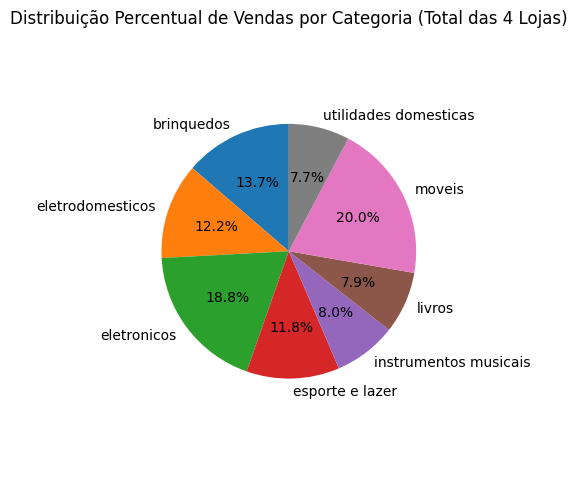

In [23]:
resultados = []

for nome_loja, url in urls.items():
  df = pd.read_csv(url)
  contagem = df.groupby('Categoria do Produto').size().reset_index(name = 'Quantidade Vendida')
  contagem['loja'] = nome_loja
  resultados.append(contagem)

vendas_por_categoria = pd.concat(resultados)
print(vendas_por_categoria.sort_values(by = ['Categoria do Produto', 'Quantidade Vendida'], ascending = (True, False)))

##Grafico
vendas_totais_categoria = vendas_por_categoria.groupby('Categoria do Produto')['Quantidade Vendida'].sum().reset_index()

plt.figure(figsize=(5, 5))
plt.pie(
    vendas_totais_categoria['Quantidade Vendida'],
    labels=vendas_totais_categoria['Categoria do Produto'],
    autopct='%1.1f%%',
    startangle=90,
)
plt.title('Distribuição Percentual de Vendas por Categoria (Total das 4 Lojas)')
plt.axis('equal')
plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas

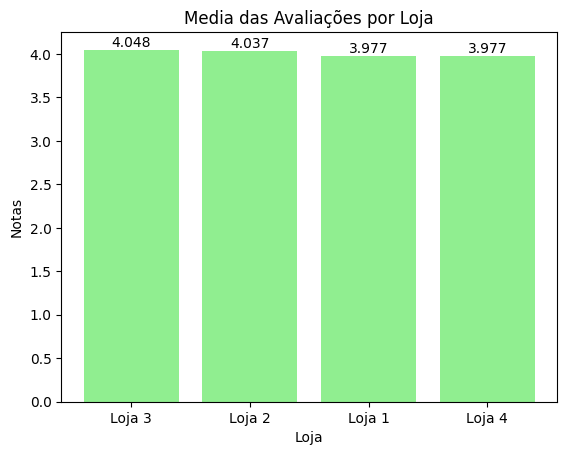

     loja  media_avaliacao
2  Loja 3         4.048326
1  Loja 2         4.037304
0  Loja 1         3.976685
3  Loja 4         3.976685


In [24]:
resultados = []
lista_de_lojas = [loja, loja2, loja3, loja4]
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

for loja, nome in zip(lista_de_lojas, nomes_lojas):
  media = loja['Avaliação da compra'].mean()
  resultados.append({'loja': nome, 'media_avaliacao': media})

df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values(by = 'media_avaliacao', ascending = False)

## Grafico

plt.bar(df_resultados['loja'], df_resultados['media_avaliacao'], color = 'lightgreen')
for i, valor in enumerate(df_resultados['media_avaliacao']):
  plt.text(i, valor, f'{valor :.3f}', ha = 'center', va = 'bottom')
plt.title('Media das Avaliações por Loja')
plt.xlabel('Loja')
plt.ylabel('Notas')
plt.show()
print(df_resultados)

# 4. Produtos Mais e Menos Vendidos

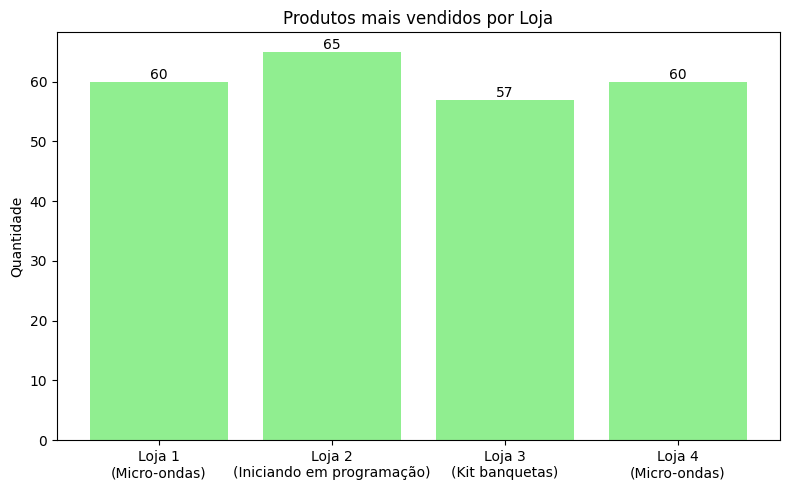

In [25]:
resultados = [] #lista para armazenar o dicionario de valores
lista_de_lojas = [loja, loja2, loja3, loja4]
nomes_lojas= ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

for loja, nome in zip(lista_de_lojas, nomes_lojas): # cria uma lista com os iteraveis da lista e os respectivos nomes
  contagem = loja['Produto'].value_counts() #conta as linhas da coluna produto

  mais_vendido = contagem.idxmax() #qual produto foi mais vendido
  qtd_mais_vendido = contagem.max() #conta quantas vezes o produto que mais se repete aparece

  menos_vendido = contagem.idxmin() #qual produto foi menos vendido
  qtd_menos_vendido = contagem.min() #conta quantas vezes o produto que menos se repete aparece

  resultados.append({'loja': nome,
                     'mais_vendido': mais_vendido,
                     'qtd_mais_vendido': qtd_mais_vendido,
                     'menos_vendido': menos_vendido,
                     'qtd_menos_vendido': qtd_menos_vendido}) #envia os valores para lista vazia

df_resultados = pd.DataFrame(resultados) #transforma a lista de resultado em um dataframe
##Grafico mais vendidos

df_resultados['label'] = df_resultados['loja'] + '\n(' + df_resultados['mais_vendido'] + ')' #Formatação para aparecer qual loja e o seu produto mais vendido

fig = plt.figure(figsize = (8, 5)) # aumenta o tamanho do gráfico
plt.bar(df_resultados['label'], df_resultados['qtd_mais_vendido'], color = 'lightgreen') #diz o que deve aparecer no gráfico
for i, valor in enumerate(df_resultados['qtd_mais_vendido']):
  plt.text(i, valor, f'{valor}', ha = 'center', va = 'bottom') #loop para indicar os valores de cada barra do gráfico
plt.title('Produtos mais vendidos por Loja')
plt.ylabel('Quantidade')
plt.tight_layout() #a ultima da barra da direita estava ficando para fora do gráfico
plt.show()
#print(df_resultados)

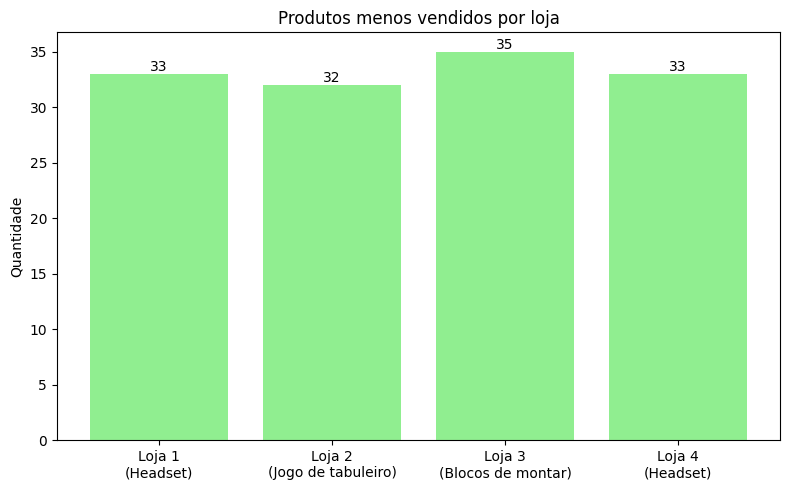

In [26]:
## Grafico menos vendidos
df_resultados['label'] = df_resultados['loja'] + '\n(' + df_resultados['menos_vendido'] + ')' #Formatação para aparecer qual loja e o seu produto menos vendido

fig = plt.figure(figsize = (8, 5)) # aumenta o tamanho do gráfico
plt.bar(df_resultados['label'], df_resultados['qtd_menos_vendido'], color = 'lightgreen') #diz o que deve aparecer no gráfico
for i, valor in enumerate(df_resultados['qtd_menos_vendido']):
  plt.text(i, valor, f'{valor}', ha = 'center', va = 'bottom') #loop para indicar os valores de cada barra do gráfico
plt.title('Produtos menos vendidos por loja')
plt.ylabel('Quantidade')
plt.tight_layout() #a ultima da barra da direita estava ficando para fora do gráfico
plt.show()
#print(df_resultados)

# 5. Frete Médio por Loja


In [27]:
resultados = []

lista_lojas = [loja, loja2, loja3, loja4]
nomes_lojas = ['Loja 1' , 'Loja 2', 'Loja 3', 'Loja 4']

for loja, nome in zip(lista_lojas, nomes_lojas):
  frete_medio = loja['Frete'].mean()
  resultados.append({'loja': nome, 'frete_medio': frete_medio}) #calcula a media de cada iteravel passando pela lista de datasets das lojas na coluna 'frete'

df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values(by = 'frete_medio', ascending = False)
print(df_resultados)

     loja  frete_medio
0  Loja 1    34.691805
3  Loja 4    34.691805
1  Loja 2    33.621941
2  Loja 3    33.074464


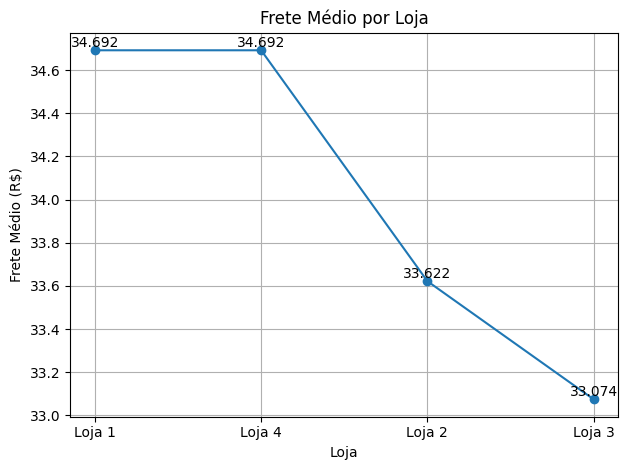

In [28]:
## Gráfico
plt.plot(df_resultados['loja'], df_resultados['frete_medio'], marker='o', linestyle='-')
for i, valor in enumerate(df_resultados['frete_medio']):
  plt.text(i, valor, f'{valor:.3f}', ha = 'center', va = 'bottom')
plt.title('Frete Médio por Loja')
plt.xlabel('Loja')
plt.ylabel('Frete Médio (R$)')
plt.grid(True)
plt.tight_layout()
plt.show()



##MAPA DE CALOR


In [29]:
pip install folium

In [30]:
import folium
from folium.plugins import HeatMap

In [31]:
m = folium.Map(location=[loja3['lat'].mean(), loja3['lon'].mean()], zoom_start=4)

heat_data = loja3[['lat', 'lon']].values.tolist()
HeatMap(heat_data).add_to(m)

m.save('mapa_calor_loja3.html')
m


## 📌 **Objetivo**

Esta análise tem como objetivo identificar qual das quatro lojas da Alura Store apresenta o pior desempenho e, com base nisso, auxiliar na tomada de decisão sobre onde cessar investimentos e concentrar recursos nas operações mais lucrativas.

---

## 💰 **Faturamento por Loja**

Com base nos dados do último ano, a **Loja 1 foi a que mais faturou**, com um total de **R$1.534.509.12*, seguida pelas Lojas 4 e 2.  
A **Loja 3 apresentou o menor faturamento**, com **R$1.464.025.03**, uma diferença de mais de **R$70 mil** em relação à Loja 1.

*A discrepância é significativa e justifica uma análise mais profunda sobre o desempenho da Loja 3.*

---

## 📦 **Categorias de Produtos**

Entre todas as lojas, as principais categorias vendidas foram:

- **Móveis**
- **Eletrônicos**
- **Brinquedos**

A categoria de **utilidades domésticas** representou apenas **7,7% das vendas totais**, sendo a **Loja 1** a que menos vendeu nessa categoria (**171 produtos**), seguida pela **Loja 3** (**177 produtos**).

Contudo, a categoria de **Móveis** que representa **20% das vendas totais**, a **Loja 3** foi a que mais vendeu na categoria(**499 produtos**).

---

## ⭐ **Avaliações dos Clientes**

Apesar do baixo faturamento, a **Loja 3 apresenta boa média de avaliação dos clientes: 4,0 estrelas**, superior à média das demais lojas, com **desvio padrão de apenas 0,03 entre as 4 lojas**. Isso indica que a experiência do cliente é consistente, mas não está alavancando as vendas da Loja com melhor avaliação (**Loja 3**).

---

## 🛒 **Produtos Mais e Menos Vendidos**

- A **Loja 2** lidera nas vendas do produto mais popular (*Curso: Iniciando em Programação*), com **65 unidades vendidas**.
- A **Loja 3** está em último lugar nesse quesito, com **57 unidades do seu produto mais vendido** (*Kit de Banquetas*).

Sobre os produtos menos vendidos:
- As **Lojas 1 e 4** empataram com **33 vendas** do item menos vendido (*Headset*).
- A **Loja 3**, mesmo nesse aspecto, teve baixa performance, com **apenas 35 vendas** (*Bloco de montar*).

---

## 🚚 **Frete Médio**

- **Lojas 1 e 4**: R$35,00 (aproximadamente)
- **Loja 2**: R$33,00
- **Loja 3**: R$33,00

*O custo médio de frete é uniforme entre as lojas, não influenciando significativamente o desempenho da Loja 3.*

---

## 📍 **Localização e Vendas**

Com base nas coordenadas geográficas (lat/lon), o mapa de calor mostra que as todas as lojas estão distribuindo seus produtos para as mesmas localidades, ou seja, podemos descartar o fato geográfico estar impactando negativamente no desempenho financeiro da **Loja 3**.

---

## ✅ **Conclusão**

Apesar da **Ótima avaliação dos clientes**, a **Loja 3 apresenta o pior desempenho em quase todas as métricas financeiras e operacionais analisadas**.

Antes de encerrar a operação da loja, recomenda-se:

- Investigar os custos operacionais (estoque, logística, marketing).
- Analisar se o público-alvo da Loja 3 está bem definido.
- Verificar se as avaliações do cliente tem ligação com alguma outra métrica (*Vendedor, Frete, Preço*).

Portanto, com base nos dados atuais, é recomendado **uma análise mais profunda**, uma vez que a Loja 3 **domina as vendas** da principal categoria de produtos da *Alura Store*.
